## About Data
- Invasive Ductal Carcinoma (IDC) is the most common subtype of all breast cancers. To assign an aggressiveness grade to a whole mount sample, pathologists typically focus on the regions which contain the IDC. As a result, one of the common pre-processing steps for automatic aggressiveness grading is to delineate the exact regions of IDC inside of a whole mount slide.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
data_dir = "/Volumes/External_HD/Data/Kaggle/Medical/breastcancer"

In [3]:
import os

In [4]:
os.listdir(data_dir)

['.DS_Store', 'test', 'train']

In [5]:
train_dir = data_dir +"/train"

## listing out all training classifications 
- Appears we have 280 differenct classiifcaitons in the Training set

In [6]:
len(os.listdir(train_dir))

280

In [7]:
os.listdir(train_dir)

['.DS_Store',
 '10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262',
 '10264',
 '10268',
 '10269',
 '10272',
 '10273',
 '10274',
 '10275',
 '10276',
 '10277',
 '10278',
 '10279',
 '10282',
 '10285',
 '10286',
 '10288',
 '10290',
 '10291',
 '10292',
 '10293',
 '10295',
 '10299',
 '10300',
 '10301',
 '10302',
 '10303',
 '10304',
 '10305',
 '10306',
 '10307',
 '10308',
 '12241',
 '12242',
 '12626',
 '12748',
 '12749',
 '12750',
 '12751',
 '12752',
 '12810',
 '12811',
 '12817',
 '12818',
 '12819',
 '12820',
 '12821',
 '12822',
 '12823',
 '12824',
 '12826',
 '12867',
 '12868',
 '12869',
 '12870',
 '12871',
 '12872',
 '12873',
 '12875',
 '12876',
 '12877',
 '12878',
 '12879',
 '12880',
 '12881',
 '12882',
 '12883',
 '12884',
 '12886',
 '12890',
 '12891',
 '12892',
 '12893',
 '12894',
 '12895',
 '12896',
 '12897',
 '12898',
 '12900',
 '12901',
 '12905',
 '12906',
 '12907',
 '12908',
 '12909',
 '12910',
 '12911',
 '12929',
 '12930',
 '12931',
 '1293

### Listing the our the testing classificaitons
- We also have 280 classificaiton of images in the test set
- WE have an even training and testing set

In [8]:
test_dir = data_dir+"/test"

In [9]:
os.listdir(test_dir)

['.DS_Store',
 '10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262',
 '10264',
 '10268',
 '10269',
 '10272',
 '10273',
 '10274',
 '10275',
 '10276',
 '10277',
 '10278',
 '10279',
 '10282',
 '10285',
 '10286',
 '10288',
 '10290',
 '10291',
 '10292',
 '10293',
 '10295',
 '10299',
 '10300',
 '10301',
 '10302',
 '10303',
 '10304',
 '10305',
 '10306',
 '10307',
 '10308',
 '12241',
 '12242',
 '12626',
 '12748',
 '12749',
 '12750',
 '12751',
 '12752',
 '12810',
 '12811',
 '12817',
 '12818',
 '12819',
 '12820',
 '12821',
 '12822',
 '12823',
 '12824',
 '12826',
 '12867',
 '12868',
 '12869',
 '12870',
 '12871',
 '12872',
 '12873',
 '12875',
 '12876',
 '12877',
 '12878',
 '12879',
 '12880',
 '12881',
 '12882',
 '12883',
 '12884',
 '12886',
 '12890',
 '12891',
 '12892',
 '12893',
 '12894',
 '12895',
 '12896',
 '12897',
 '12898',
 '12900',
 '12901',
 '12905',
 '12906',
 '12907',
 '12908',
 '12909',
 '12910',
 '12911',
 '12929',
 '12930',
 '12931',
 '1293

In [10]:
len(os.listdir(test_dir))

280

### Taking a look at a single infected and not infected cell

### Uninfected Image

In [11]:
os.listdir(train_dir+"/10253"+"/0")[0]

'10253_idx5_x1001_y1001_class0.png'

In [12]:
uninfected_cell_dir = train_dir+"/10253"+"/0"+"/10253_idx5_x1001_y1001_class0.png"

In [13]:
uninfected_cell_img = imread(uninfected_cell_dir)

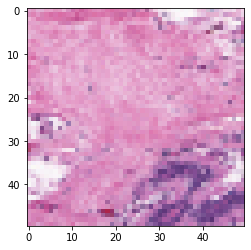

In [14]:
plt.imshow(uninfected_cell_img)

### Invasive Ductal Carcinoma (IDC)

In [15]:
os.listdir(train_dir+"/10253/1")[1]

'10253_idx5_x501_y401_class1.png'

In [16]:
idc_img_dir = train_dir+"/10253"+"/1"+"/10253_idx5_x501_y401_class1.png"

In [17]:
idc_cell = imread(idc_img_dir)

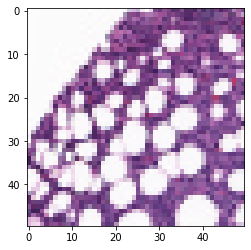

In [18]:
plt.imshow(idc_cell)

### Lets check the average size for each image in training set 
- Looks like all images is 50x50 whih is excellent

In [21]:
dim1 = []
dim2 = []
cdim = []
for image_name in os.listdir(train_dir+"/10253"+"/0"):
    img = imread(train_dir+"/10253"+"/0/"+image_name)
    d1,d2,c_dim = img.shape
    dim1.append(d1)
    dim2.append(d2)
    cdim.append(c_dim)

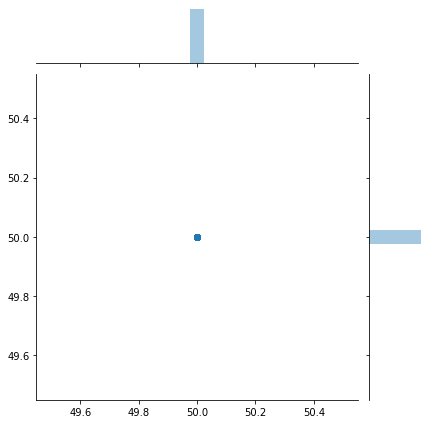

In [24]:
sns.jointplot(dim1, dim2)

In [25]:
network_image_shape = (50,50,3)

### Lets create an image Generator for the images

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
image_gen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range= 0.3,
    zoom_range= 0.2,
    fill_mode= "nearest",
    horizontal_flip= True,
    vertical_flip= True,
    rescale= 1/255,
)

### Testing our generator

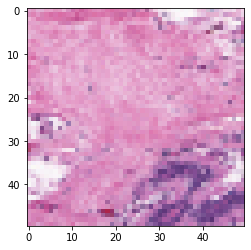

In [43]:
plt.imshow(uninfected_cell_img)

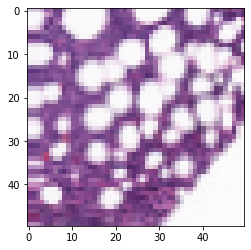

In [48]:
plt.imshow(image_gen.random_transform(idc_cell))

### Get all the images needed for out generator 
- Flow from directory

In [49]:
image_gen.flow_from_directory(train_dir)

Found 277524 images belonging to 279 classes.


In [50]:
image_gen.flow_from_directory(test_dir)

Found 277524 images belonging to 279 classes.


### Building the model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [80]:
model = Sequential()
model.add(Conv2D(activation = "relu", kernel_size = (2,2), 
                strides = (1,1), input_shape = network_image_shape, padding = "valid", filters = 32))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(activation = "relu", kernel_size = (2,2), 
                strides = (1,1), input_shape = network_image_shape, padding = "valid", filters = 64))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(activation = "relu", kernel_size = (2,2), 
                strides = (1,1), input_shape = network_image_shape, padding = "valid", filters = 64))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [81]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 64)        16448     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

## Callbacks

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
stop = EarlyStopping(monitor="val_loss", mode= "min", patience=5)

### Batch Size
- We have alot of images so batching the imaes will assist the model in training (power of 2)

In [84]:
batch_size = 16

### Model will train on two generators 
- We will need two for the traiing and testing data
- Will need to remove shufling form test set - makes a random batch of data points for you. But we will neot need this for the testing set. 
- lAbes will get shuffled around - we dont want this

In [85]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                        target_size= network_image_shape[:2],
                    color_mode= "rgb", batch_size= batch_size, class_mode= "binary")

Found 277524 images belonging to 279 classes.


In [86]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                        target_size= network_image_shape[:2],
                    color_mode= "rgb", batch_size= batch_size, class_mode= "binary", shuffle=False)

Found 277524 images belonging to 279 classes.


### Take a look at the image indicies 

In [87]:
train_image_gen.class_indices

{'10253': 0,
 '10254': 1,
 '10255': 2,
 '10256': 3,
 '10257': 4,
 '10258': 5,
 '10259': 6,
 '10260': 7,
 '10261': 8,
 '10262': 9,
 '10264': 10,
 '10268': 11,
 '10269': 12,
 '10272': 13,
 '10273': 14,
 '10274': 15,
 '10275': 16,
 '10276': 17,
 '10277': 18,
 '10278': 19,
 '10279': 20,
 '10282': 21,
 '10285': 22,
 '10286': 23,
 '10288': 24,
 '10290': 25,
 '10291': 26,
 '10292': 27,
 '10293': 28,
 '10295': 29,
 '10299': 30,
 '10300': 31,
 '10301': 32,
 '10302': 33,
 '10303': 34,
 '10304': 35,
 '10305': 36,
 '10306': 37,
 '10307': 38,
 '10308': 39,
 '12241': 40,
 '12242': 41,
 '12626': 42,
 '12748': 43,
 '12749': 44,
 '12750': 45,
 '12751': 46,
 '12752': 47,
 '12810': 48,
 '12811': 49,
 '12817': 50,
 '12818': 51,
 '12819': 52,
 '12820': 53,
 '12821': 54,
 '12822': 55,
 '12823': 56,
 '12824': 57,
 '12826': 58,
 '12867': 59,
 '12868': 60,
 '12869': 61,
 '12870': 62,
 '12871': 63,
 '12872': 64,
 '12873': 65,
 '12875': 66,
 '12876': 67,
 '12877': 68,
 '12878': 69,
 '12879': 70,
 '12880': 71,
 '

In [88]:
test_image_gen.class_indices

{'10253': 0,
 '10254': 1,
 '10255': 2,
 '10256': 3,
 '10257': 4,
 '10258': 5,
 '10259': 6,
 '10260': 7,
 '10261': 8,
 '10262': 9,
 '10264': 10,
 '10268': 11,
 '10269': 12,
 '10272': 13,
 '10273': 14,
 '10274': 15,
 '10275': 16,
 '10276': 17,
 '10277': 18,
 '10278': 19,
 '10279': 20,
 '10282': 21,
 '10285': 22,
 '10286': 23,
 '10288': 24,
 '10290': 25,
 '10291': 26,
 '10292': 27,
 '10293': 28,
 '10295': 29,
 '10299': 30,
 '10300': 31,
 '10301': 32,
 '10302': 33,
 '10303': 34,
 '10304': 35,
 '10305': 36,
 '10306': 37,
 '10307': 38,
 '10308': 39,
 '12241': 40,
 '12242': 41,
 '12626': 42,
 '12748': 43,
 '12749': 44,
 '12750': 45,
 '12751': 46,
 '12752': 47,
 '12810': 48,
 '12811': 49,
 '12817': 50,
 '12818': 51,
 '12819': 52,
 '12820': 53,
 '12821': 54,
 '12822': 55,
 '12823': 56,
 '12824': 57,
 '12826': 58,
 '12867': 59,
 '12868': 60,
 '12869': 61,
 '12870': 62,
 '12871': 63,
 '12872': 64,
 '12873': 65,
 '12875': 66,
 '12876': 67,
 '12877': 68,
 '12878': 69,
 '12879': 70,
 '12880': 71,
 '

In [ ]:
results = model.fit_generator(train_image_gen, epochs=5)

Epoch 1/5
  226/17346 [..............................] - ETA: 3:10:47 - loss: -1987.9999